<a href="https://colab.research.google.com/github/paolamartinezmt/Cyberpanel/blob/main/Segunda_entrega_del_proyecto_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerias ##

Realizamos la importación de la librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#pip install tensorflow

## Importando dataset##

Realizamos la importación del dataset en .cvs

In [ ]:
df_btc = pd.read_csv("BTC-Daily.csv")
df_btc

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


##DATOS

**Unix Timestamp:** esta es la marca de tiempo de Unix o también conocida como "Epoch Time". Utilice esto para convertir a su zona horaria local

**Date: ** esta marca de tiempo es la zona horaria UTC

**Symbol:** el símbolo al que se refieren los datos de la serie temporal.
Open: este es el precio de apertura del período de tiempo.

**High:** este es el precio más alto del período de tiempo.

**Low:** este es el precio más bajo del período de tiempo.

**Close:** este es el precio de cierre del período de tiempo.

**Volume (Crypto):** este es el volumen en el Ccy transado. Es decir. Para BTC/USDT, esto es en cantidad BTC

**Volume Base Ccy:** este es el volumen en el ccy base/convertido. Es decir. Para BTC/USDT, esto es en cantidad de USDT

"volumen en el CCY base/convertido" podría referirse al volumen de transacciones expresado en términos de la moneda base y la moneda convertida en un par de divisas específico. Esto proporciona información sobre la cantidad de actividad comercial que ha tenido lugar en ese par de divisas durante un período de tiempo dado. El volumen en el mercado de divisas es un indicador importante, ya que puede ayudar a los analistas a evaluar la fuerza o debilidad de una tendencia y la participación del mercado.

## Limpieza de datos ##


Revisamos una visión general rápida de la estructura y el contenido del  DataFrame para comprender sus dimensiones y la calidad de los datos y validar si hay valores Faltantes

In [ ]:
df_btc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


**Datos Faltantes**

Validamos la cantidad de valores nulos (o faltantes) en cada columna

In [ ]:
df_btc.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

Eliminamos datos irelevantes para nuestro objetivo

In [ ]:
df_btc.drop(['unix', 'symbol'], axis=1, inplace=True)

In [ ]:
df_btc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2651 non-null   object 
 1   open        2651 non-null   float64
 2   high        2651 non-null   float64
 3   low         2651 non-null   float64
 4   close       2651 non-null   float64
 5   Volume BTC  2651 non-null   float64
 6   Volume USD  2651 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.1+ KB


**Datos Anomalos**

Validamos los datos anomalos los valores en la columna que están muy por encima o por debajo de la
media más o menos ciertas desviaciones estándar (definidas por const) se considerarán como datos anómalos.
Los límites superior e inferior actúan como umbrales para identificar estos datos anómalos. La función devuelve
 la cantidad de datos anómalos encontrados tanto por encima del límite
 superior como por debajo del límite inferior en la columna especificada.

In [ ]:
nuevo_df = df_btc[["open", "high", "low", "close", "Volume BTC", "Volume USD"]]

nuevo_df

,open,high,low,close,Volume BTC,Volume USD
0,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...
2646,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [ ]:
def verificar_datos_anomalos(df1, column_name, const):
    mean = df1[column_name].mean()
    desv = df1[column_name].std()

    lim_sup = mean + (desv * const)
    lim_inf = mean - (desv * const)

    print("Column name: ", column_name)
    print("Limite superior", lim_sup)
    print("Limite inferior", lim_inf)

    cant_sup = df1[df1[column_name] > lim_sup].shape[0]
    cant_inf = df1[df1[column_name] < lim_inf].shape[0]

    return cant_sup, cant_inf



In [ ]:
columnas =nuevo_df.columns
constante = 10
for columna in columnas:
    cantidades = verificar_datos_anomalos(nuevo_df, columna, constante)
    print(f"Para la columna '{columna}':")
    print("Cantidad de valores por encima del límite superior:", cantidades[0])
    print("Cantidad de valores por debajo del límite inferior:", cantidades[1])
    print("=" * 50)

Column name:  open
Limite superior 174418.7367968936
Limite inferior -151032.35813223873
Para la columna 'open':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  high
Limite superior 179430.93291327683
Limite inferior -155353.80708905956
Para la columna 'high':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  low
Limite superior 168479.51457400568
Limite inferior -145886.43565284385
Para la columna 'low':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  close
Limite superior 174538.41325241994
Limite inferior -151119.76082692013
Para la columna 'close':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  Volume BTC
Limite superior 484837058.92691195
Limite inferior -458236231.37606096
Para la columna '

Se crea una función con la cual se va a realizar la transformación de los datos anomalos.

Se van a sustituir los valores anomalos por la media en las columnas: Volume BTC y Volume USD


In [ ]:
def sustituir_datos_anomalos(df1, column_name, const):
    mean = df1[column_name].mean()
    desv = df1[column_name].std()

    lim_sup = mean + (desv * const)
    lim_inf = mean - (desv * const)

    df1.loc[df1[column_name] >= lim_sup, column_name] = mean
    df1.loc[df1[column_name] < lim_inf, column_name] = mean

    return df1

In [ ]:
df_btc = sustituir_datos_anomalos(df_btc, 'Volume USD', 10)
df_btc = sustituir_datos_anomalos(df_btc, 'Volume BTC', 6)

Se valida que ya no existan valores anomalos

In [ ]:
nuevo_df = df_btc[["open", "high", "low", "close", "Volume BTC", "Volume USD"]]

columnas =nuevo_df.columns
constante = 10
for columna in columnas:
    cantidades = verificar_datos_anomalos(nuevo_df, columna, constante)
    print(f"Para la columna '{columna}':")
    print("Cantidad de valores por encima del límite superior:", cantidades[0])
    print("Cantidad de valores por debajo del límite inferior:", cantidades[1])
    print("=" * 50)

Column name:  open
Limite superior 174418.7367968936
Limite inferior -151032.35813223873
Para la columna 'open':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  high
Limite superior 179430.93291327683
Limite inferior -155353.80708905956
Para la columna 'high':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  low
Limite superior 168479.51457400568
Limite inferior -145886.43565284385
Para la columna 'low':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  close
Limite superior 174538.41325241994
Limite inferior -151119.76082692013
Para la columna 'close':
Cantidad de valores por encima del límite superior: 0
Cantidad de valores por debajo del límite inferior: 0
Column name:  Volume BTC
Limite superior 368573755.1712249
Limite inferior -346257225.15035814
Para la columna 'V

**Transformación de datos**

Nos aseguramos que los campos que corresponden a las fechas esten en formato datetime

In [ ]:
df_btc['date'] = pd.to_datetime(df_btc['date'])

df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   open        2651 non-null   float64       
 2   high        2651 non-null   float64       
 3   low         2651 non-null   float64       
 4   close       2651 non-null   float64       
 5   Volume BTC  2651 non-null   float64       
 6   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 145.1 KB


In [ ]:
#df_btc.set_index('date', inplace=True)

In [ ]:
df_btc

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2646,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


##Visualización de datos:

Se muestra el precio historico del Bitcoin desde el año 2015 hasta el año 2022. En donde se puede concluir que ha tenido una tendencia alcista, teniendo su pico más alto a finales del año 2021

In [ ]:
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc.set_index('date', inplace=True)

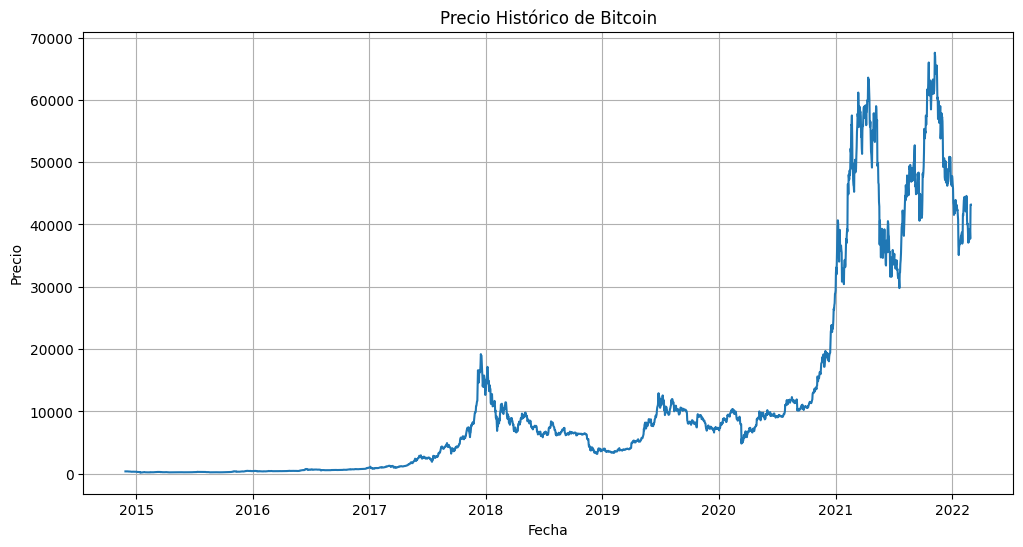

In [ ]:
# Gráfico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_btc['close'])
plt.title('Precio Histórico de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


## Análisis exploratorio ##

**Análisis de tendencias:**


    
    Calcula y visualiza tendencias a lo largo del tiempo

Se calcula la media movil de 30 y 10 días.

La media movil, representa una tendencia a corto plazo en los precios. Una media movil corta (por ejemplo, de 10 días) responderá rápidamente a los cambios de precio, mientras que una media movil más larga (por ejemplo, de 30 días) suavizará más los movimientos de precios.   

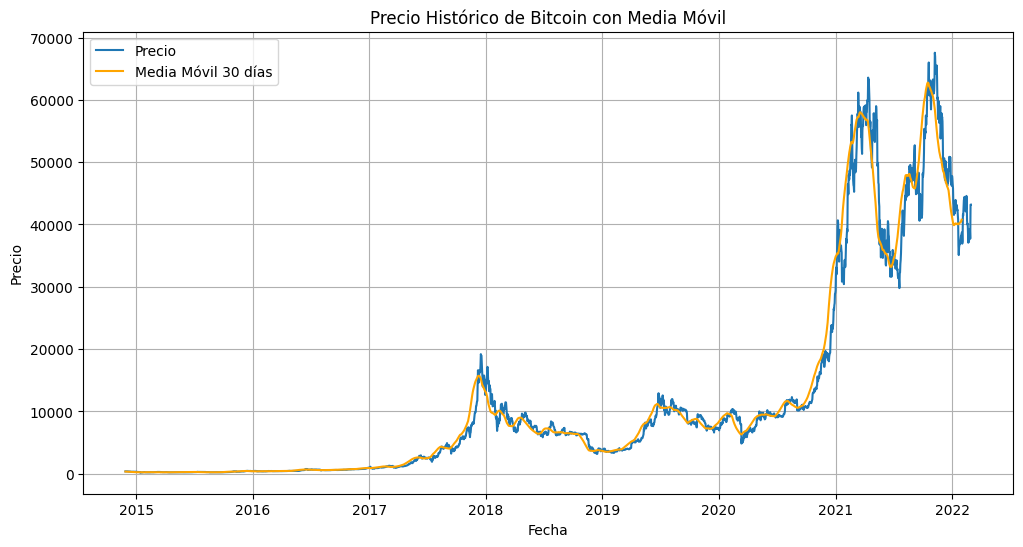

In [ ]:
# Promedio móvil (Media móvil) de 30 días
df_btc['MA_30'] = df_btc['close'].rolling(window=30).mean()

# Gráfico de la serie de tiempo con la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df_btc['close'], label='Precio')
plt.plot(df_btc['MA_30'], label='Media Móvil 30 días', color='orange')
plt.title('Precio Histórico de Bitcoin con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

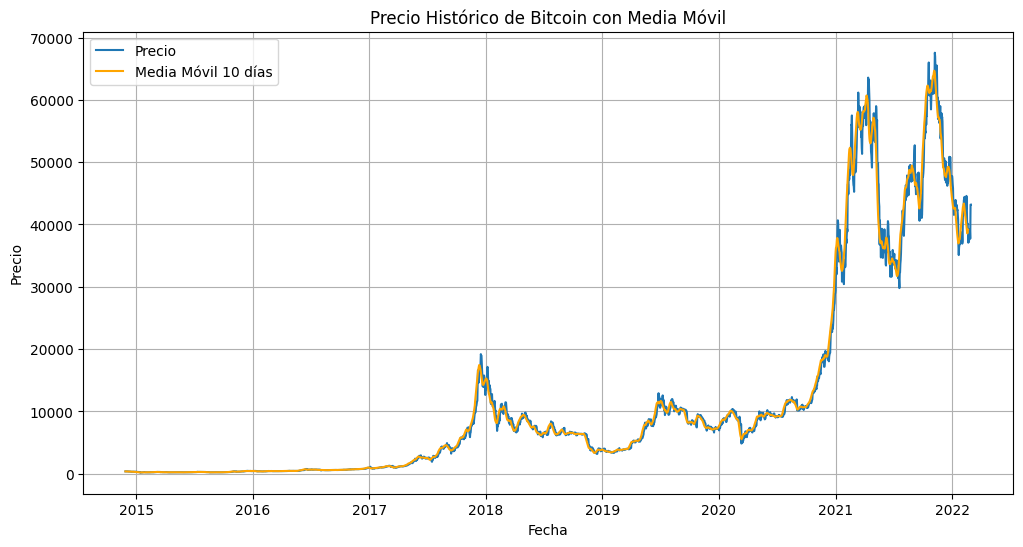

In [ ]:
# Promedio móvil (Media móvil) de 10 días
df_btc['MA_10'] = df_btc['close'].rolling(window=10).mean()

# Gráfico de la serie de tiempo con la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df_btc['close'], label='Precio')
plt.plot(df_btc['MA_10'], label='Media Móvil 10 días', color='orange')
plt.title('Precio Histórico de Bitcoin con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

**Normalización de las medias moviles**




Con la normalización se puede comparar características de manera más equitativa. Esto significa que las diferencias en valores normalizados reflejarán proporciones relativas similares a las diferencias en los valores originales. Esto facilita la identificación de patrones y relaciones entre las características.

In [ ]:
df_btc.dropna(subset=['MA_30'], inplace=True)

In [ ]:
def min_max_normalization(column):
    return (column - column.min()) / (column.max() - column.min())

df_btc['Normalized_SMA_10'] = min_max_normalization(df_btc['MA_10'])
df_btc['Normalized_SMA_30'] = min_max_normalization(df_btc['MA_30'])

print(df_btc['Normalized_SMA_10'])

date
2022-01-31    0.631604
2022-01-30    0.621545
2022-01-29    0.612395
2022-01-28    0.602901
2022-01-27    0.594816
                ...   
2014-12-02    0.002421
2014-12-01    0.002467
2014-11-30    0.002506
2014-11-29    0.002546
2014-11-28    0.002564
Name: Normalized_SMA_10, Length: 2622, dtype: float64


In [ ]:
print(df_btc['Normalized_SMA_30'])

date
2022-01-31    0.648106
2022-01-30    0.645312
2022-01-29    0.642655
2022-01-28    0.642674
2022-01-27    0.641641
                ...   
2014-12-02    0.001848
2014-12-01    0.001879
2014-11-30    0.001912
2014-11-29    0.001945
2014-11-28    0.001977
Name: Normalized_SMA_30, Length: 2622, dtype: float64


###Corelación entre variables

La fuerza de la correlación entre dos variables se mide mediante el coeficiente de correlación. El coeficiente de correlación puede variar en rango de -1 a 1, donde:

1 indica una correlación positiva perfecta: A medida que una variable aumenta, la otra también lo hace en proporción constante.

-1 indica una correlación negativa perfecta: A medida que una variable aumenta, la otra disminuye en proporción constante.

0 indica una ausencia de correlación lineal.

Resumen:

1. High - Close: 0.9994703293686745
2. Low - Close: 0.9993360392725147
3. MA_10 - Close: 0.9966257673548928
4. Normalized_SMA_10 - Close: 0.9966257673548929
5. open - Close: 0.9988155481634559
6. MA_30 - Close: 0.9879753148822717
7. Normalized_SMA_30 - Close: 0.9879753148822725
8. Volume USD - Close: 0.6377084079559344
9. Volume BTC - Close: -0.07860426003323409

Las primeras cuatro correlaciones son muy altas, indicando una fuerte relación lineal positiva entre esas variables. Por lo tanto, se puede decir que las variables "High", "Low", "MA_10" y "Normalized_SMA_10" tienen correlaciones muy altas con respecto a la variable "Close". En términos prácticos, esto sugiere que estos indicadores tienden a moverse de manera similar a la variable "Close" en el conjunto de datos proporcionado.

In [ ]:
correlation = df_btc['open'].corr(df_btc['close'])

print(f'Coeficiente de Correlación open - Close: {correlation}')

Coeficiente de Correlación open - Close: 0.9988155481634559


In [ ]:
correlation = df_btc['high'].corr(df_btc['close'])

print(f'Coeficiente de Correlación High - Close: {correlation}')

Coeficiente de Correlación High - Close: 0.9994703293686745


In [ ]:
correlation = df_btc['low'].corr(df_btc['close'])

print(f'Coeficiente de Correlación Low - Close: {correlation}')

Coeficiente de Correlación Low - Close: 0.9993360392725147


In [ ]:
correlation = df_btc['Volume BTC'].corr(df_btc['close'])

print(f'Coeficiente de Correlación Volume BTC - Close: {correlation}')

Coeficiente de Correlación Volume BTC - Close: -0.06551962827695343


In [ ]:
correlation = df_btc['Volume USD'].corr(df_btc['close'])

print(f'Coeficiente de Correlación Volume USD - Close: {correlation}')

Coeficiente de Correlación Volume USD - Close: 0.6377084079559344


In [ ]:
correlation = df_btc['MA_30'].corr(df_btc['close'])

print(f'Coeficiente de Correlación MA_30 - Close: {correlation}')

Coeficiente de Correlación MA_30 - Close: 0.9879753148822717


In [ ]:
correlation = df_btc['MA_10'].corr(df_btc['close'])

print(f'Coeficiente de Correlación MA_10 - Close: {correlation}')

Coeficiente de Correlación MA_10 - Close: 0.9966257673548928


In [ ]:
correlation = df_btc['Normalized_SMA_10'].corr(df_btc['close'])

print(f'Coeficiente de Correlación Normalized_SMA_10 - Close: {correlation}')

Coeficiente de Correlación Normalized_SMA_10 - Close: 0.9966257673548929


In [ ]:
correlation = df_btc['Normalized_SMA_30'].corr(df_btc['close'])

print(f'Coeficiente de Correlación Normalized_SMA_30 - Close: {correlation}')

Coeficiente de Correlación Normalized_SMA_30 - Close: 0.9879753148822725


In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2622 entries, 2022-01-31 to 2014-11-28
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               2622 non-null   float64
 1   high               2622 non-null   float64
 2   low                2622 non-null   float64
 3   close              2622 non-null   float64
 4   Volume BTC         2622 non-null   float64
 5   Volume USD         2622 non-null   float64
 6   MA_30              2622 non-null   float64
 7   MA_10              2622 non-null   float64
 8   Normalized_SMA_10  2622 non-null   float64
 9   Normalized_SMA_30  2622 non-null   float64
dtypes: float64(10)
memory usage: 225.3 KB


## Algoritmo de clustering ##


Se realiza el proceso de clustering con el algortimo K-Means aplicado a los promedios moviles de Bitcoin para agrupar tendencias similares en los precios. Se agupó en 3 grupos. La información se muestra en un diagrama de dispersión.

La media movil puede ser usada como datos de entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


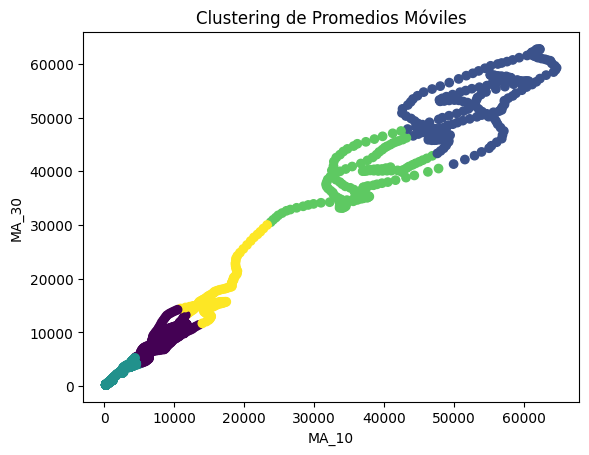

                open      high       low     close    Volume BTC  \
date                                                               
2022-01-31  37914.10  38776.33  36631.66  38491.92  2.009130e+03   
2022-01-30  38176.45  38378.88  37372.59  37941.82  7.087948e+02   
2022-01-29  37713.14  38741.67  37327.79  38192.65  1.296909e+03   
2022-01-28  37179.62  38022.11  36173.98  37748.36  2.420654e+03   
2022-01-27  36824.02  37251.00  35511.32  37208.36  3.103823e+03   
...              ...       ...       ...       ...           ...   
2014-12-02    378.39    382.86    375.23    379.25  2.593576e+06   
2014-12-01    376.40    382.31    373.03    378.39  2.520662e+06   
2014-11-30    376.57    381.99    373.32    373.34  1.145567e+06   
2014-11-29    376.42    386.60    372.25    376.72  2.746157e+06   
2014-11-28    363.59    381.34    360.57    376.28  3.220878e+06   

              Volume USD         MA_30      MA_10  Normalized_SMA_10  \
date                                       

In [ ]:
# Selecciona las columnas relevantes para el clustering
X = df_btc[['MA_10', 'MA_30']]

# Normaliza las variables para asegurarte de que todas tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Algoritmo de clustering K-Means
kmeans = KMeans(n_clusters=5)  # Especifica el número de clústeres deseado
df_btc['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de los clústeres
plt.scatter(df_btc['MA_10'], df_btc['MA_30'], c=df_btc['Cluster'], cmap='viridis')
plt.xlabel('MA_10')
plt.ylabel('MA_30')
plt.title('Clustering de Promedios Móviles')
plt.show()

print(df_btc)

**Inercia:**

La inercia es la suma de las distancias cuadradas de cada punto al centroide de su clúster. En términos simples, representa cuán compactos son los clústeres. Una inercia más baja generalmente indica clústeres más compactos.

**Puntuación de Silueta:**

La puntuación de silueta es una medida de cuán bien separados están los clústeres. La puntuación varía entre -1 y 1, donde un valor más alto indica clústeres mejor definidos y bien separados.

Tanto la inercia como la puntuación de silueta sugieren que el modelo de clustering ha producido resultados razonablemente buenos. La inercia es moderadamente baja, y la puntuación de silueta es relativamente alta, indicando clústeres compactos y bien separados.

In [ ]:
inertia = kmeans.inertia_
silhouette_score = silhouette_score(X_scaled, df_btc['Cluster'])
print(f"Inercia: {inertia}, Puntuación de Silueta: {silhouette_score}")

Inercia: 130.83648503162848, Puntuación de Silueta: 0.6852746936605544


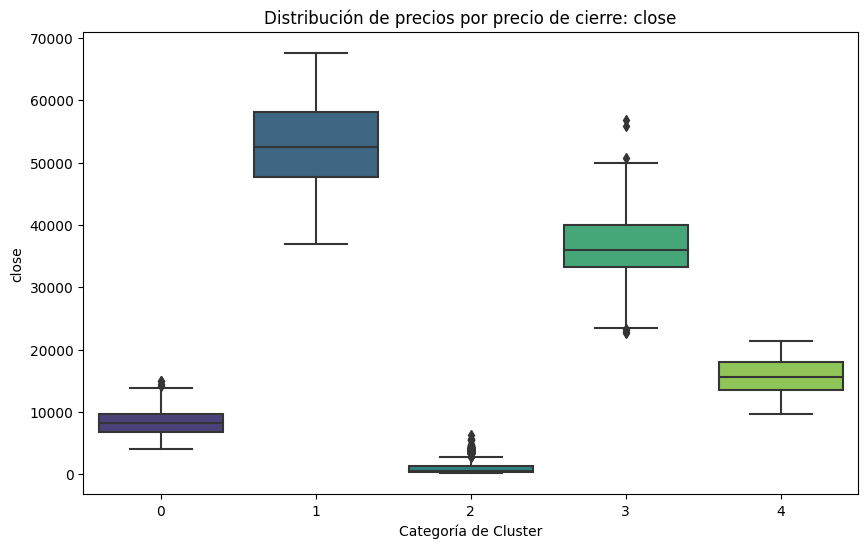

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='close', data=df_btc, palette='viridis')
plt.title('Distribución de precios por precio de cierre: close')
plt.xlabel('Categoría de Cluster')
plt.ylabel('close')
plt.show()

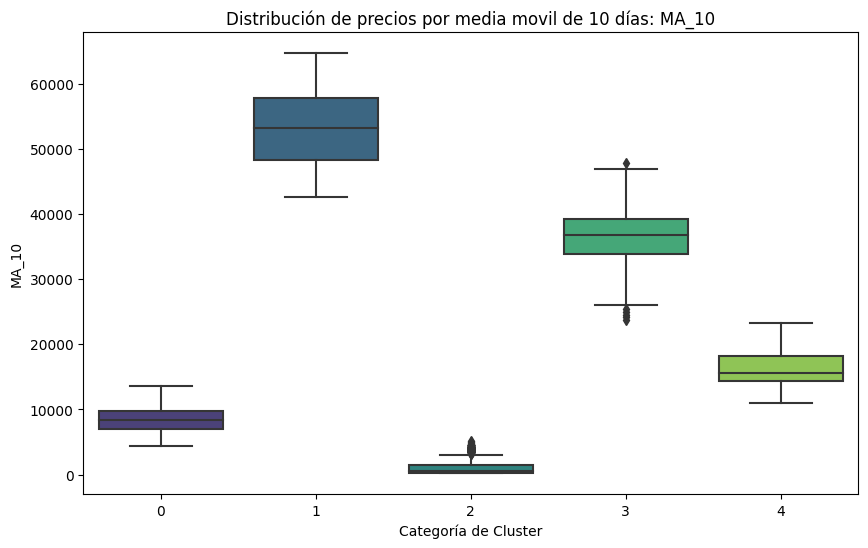

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='MA_10', data=df_btc, palette='viridis')
plt.title('Distribución de precios por media movil de 10 días: MA_10')
plt.xlabel('Categoría de Cluster')
plt.ylabel('MA_10')
plt.show()

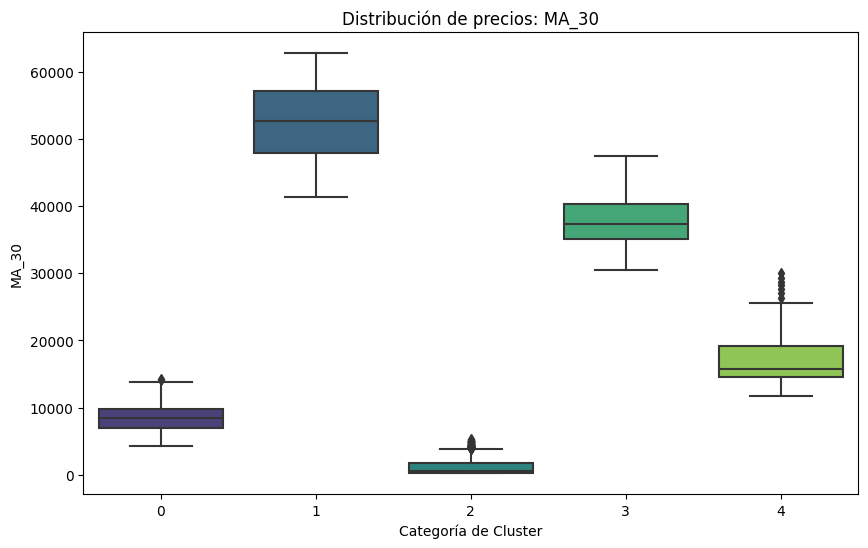

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='MA_30', data=df_btc, palette='viridis')
plt.title('Distribución de precios: MA_30')
plt.xlabel('Categoría de Cluster')
plt.ylabel('MA_30')
plt.show()

**Cálculo de estadisticas descriptivas para cada clúster**

In [ ]:
cluster_stats = df_btc.groupby('Cluster').agg(['mean', 'std', 'min', 'max', 'count'])
print(cluster_stats)

                 open                                                 high  \
                 mean          std       min       max count          mean   
Cluster                                                                      
0         8400.195199  1938.828033   4090.00  16124.02   929   8625.529699   
1        52789.150250  6708.751813  36984.28  67547.49   240  54264.588458   
2         1216.795149  1341.486955    162.00   6318.01  1175   1249.578928   
3        36704.263918  6507.798564  21358.96  58336.16   171  37958.309942   
4        15320.843178  2823.376204   9271.06  19703.53   107  15916.576449   

                                                ... Normalized_SMA_10  \
                 std       min       max count  ...              mean   
Cluster                                         ...                     
0        1987.102040   4101.70  16300.00   929  ...          0.127398   
1        6645.029609  38359.69  69000.00   240  ...          0.822170   
2        1

**Análisis de volatilidad:**
Calcula la volatilidad histroica de los precios:



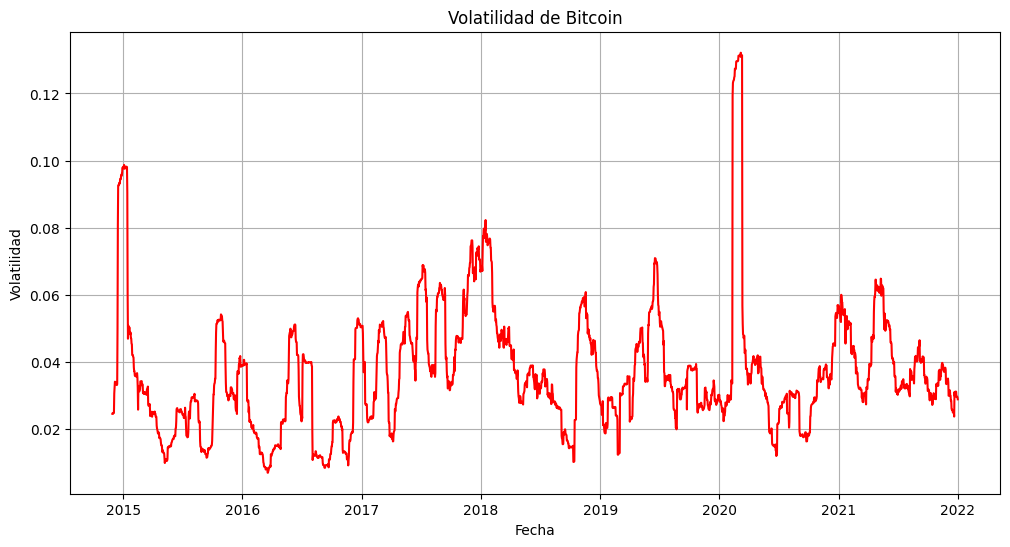

In [ ]:
# Volatilidad diaria
df_btc['Volatilidad'] = df_btc['close'].pct_change().rolling(window=30).std()

# Gráfico de volatilidad
plt.figure(figsize=(12, 6))
plt.plot(df_btc['Volatilidad'], color='red')
plt.title('Volatilidad de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.grid(True)
plt.show()

**Análisis de correlaciones:**

Si tienes datos adicionales, puedes explorar correlaciones entre el precio de Bitcoin y volumen BTC:

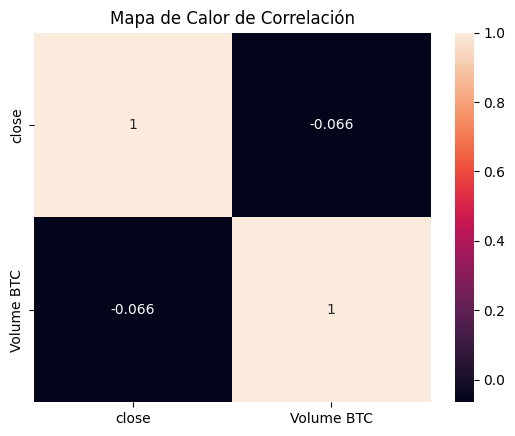

In [ ]:
correlacion = df_btc[['close', 'Volume BTC']].corr()
sns.heatmap(correlacion, annot=True)
plt.title('Mapa de Calor de Correlación')
plt.show()


###RED NEURONAL

In [ ]:
# Supongamos que tienes un DataFrame llamado df con las columnas necesarias
# Asegúrate de que la columna 'ds' contenga la fecha y 'y' contenga los precios de cierre ('Close')

# Selecciona las columnas relevantes
columns_to_use = ['ds', 'High', 'Low', 'MA_10', 'Normalized_SMA_10', 'open', 'MA_30', ]
df_subset = df[columns_to_use]

# Renombra las columnas para que coincidan con los requisitos de NeuralProphet
df_subset.rename(columns={'ds': 'ds', 'Close': 'y'}, inplace=True)

# Entrenamiento del modelo
model = NeuralProphet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_subset)

# Creación de un DataFrame con fechas futuras para hacer predicciones
future = model.make_future_dataframe(df_subset, periods=365)

# Predicciones
forecast = model.predict(future)

# Visualización de las predicciones
fig = model.plot(forecast)

5/5 [==============================] - 1s 14ms/step
Mean Squared Error (MSE): 3366112.0984259625


<ipython-input-256-d959dc6a19f7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


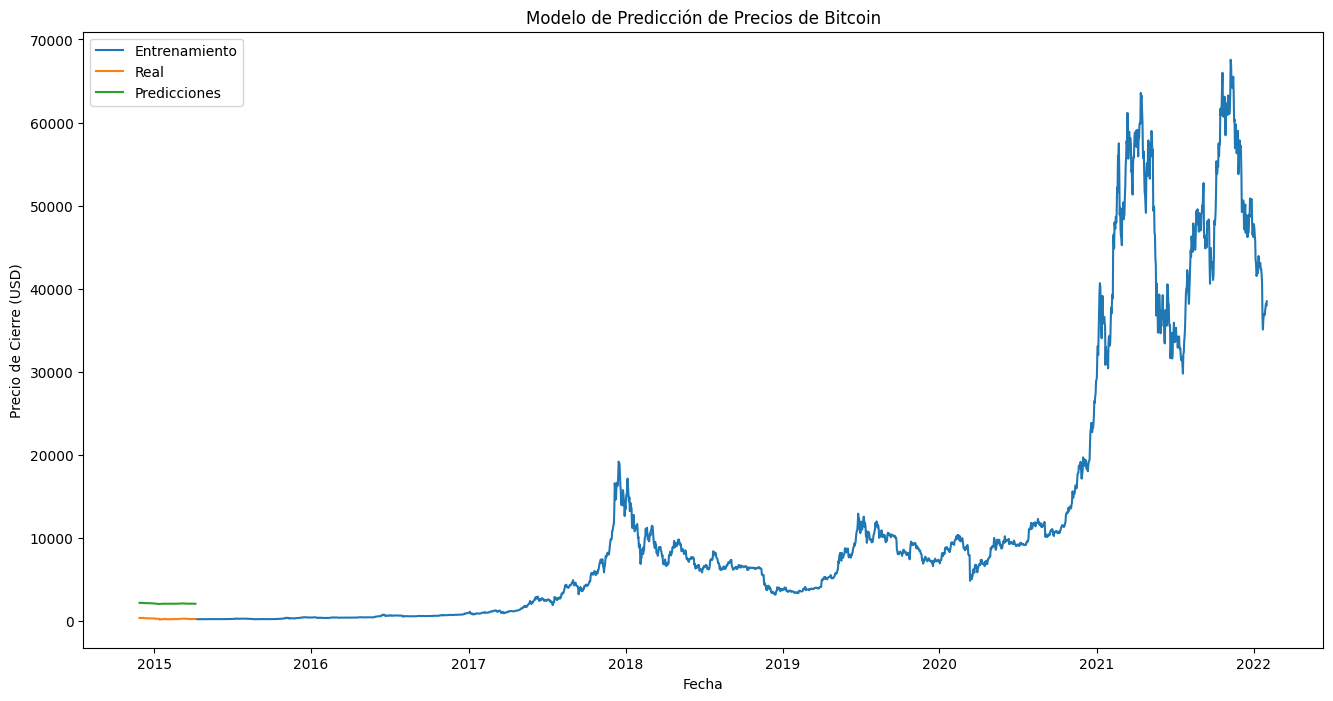

In [ ]:
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_btc['close'].values.reshape(-1, 1))

# Crear conjuntos de entrenamiento y prueba
training_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(training_data_len), :]

# Crear datos de entrenamiento
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Construir modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compilar modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Crear datos de prueba
test_data = scaled_data[training_data_len - 60:, :]

# Crear conjuntos de prueba
x_test = []
y_test = df_btc['close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertir a un arreglo numpy
x_test = np.array(x_test)

# Reshape para LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtener predicciones del modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calcular el error cuadrático medio (MSE)
mse = np.mean(np.square(predictions - y_test))
print(f'Mean Squared Error (MSE): {mse}')

# Visualizar resultados
train = df_btc[:training_data_len]
valid = df_btc[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Modelo de Predicción de Precios de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Entrenamiento', 'Real', 'Predicciones'])
plt.show()